In [1]:
import os
import csv
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Final_Datasets/MergedTVandMovies.csv")  
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
1,1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Movie,NaN
2,2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Movie,NaN
3,3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Movie,NaN
4,4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Movie,NaN


In [3]:
genredf = df[["Genres", "Netflix", "Hulu", "Prime Video", "Disney+"]]
genredf.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
1,"Action,Sci-Fi",1,0,0,0
2,"Action,Adventure,Sci-Fi",1,0,0,0
3,"Adventure,Comedy,Sci-Fi",1,0,0,0
4,Western,1,0,1,0


In [4]:
genredata = genredf.groupby('Genres')
genredata.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
1,"Action,Sci-Fi",1,0,0,0
2,"Action,Adventure,Sci-Fi",1,0,0,0
3,"Adventure,Comedy,Sci-Fi",1,0,0,0
4,Western,1,0,1,0
...,...,...,...,...,...
16718,"Documentary,Drama,History",0,0,0,1
16719,"Animation,Adventure,Drama,Family,Musical,Romance",0,0,0,1
16721,"Comedy,Family,Adventure,Fantasy,Sci-Fi",0,0,0,1
16739,"Comedy,Family,Fantasy,Horror",0,0,0,1


In [5]:
df['Genres'] = df['Genres'].str.split(',')
df = df.explode('Genres')
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Action,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Adventure,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Sci-Fi,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Thriller,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
1,1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski",Action,United States,English,136.0,Movie,NaN


In [6]:
#ignore irrelevant data
genredf = df[["Genres", "Netflix", "Hulu", "Prime Video", "Disney+"]]
genredf.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,Action,1,0,0,0
0,Adventure,1,0,0,0
0,Sci-Fi,1,0,0,0
0,Thriller,1,0,0,0
1,Action,1,0,0,0


In [7]:
#group
gengroup = genredf.groupby('Genres')
gengroup.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,Action,1,0,0,0
0,Adventure,1,0,0,0
0,Sci-Fi,1,0,0,0
0,Thriller,1,0,0,0
1,Action,1,0,0,0
...,...,...,...,...,...
4512,Film-Noir,0,0,1,0
4558,Film-Noir,0,0,1,0
4978,Game-Show,0,0,1,0
8491,Game-Show,0,0,1,0


In [8]:
#totals per genre
gencount = gengroup.count()
gencount.head()

,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
Action,2683,2683,2683,2683
Adventure,1778,1778,1778,1778
Animation,711,711,711,711
Biography,821,821,821,821
Comedy,4637,4637,4637,4637


In [9]:
total = gengroup["Genres"].count()
gencount["Total"] = total

total

Genres
Action         2683
Adventure      1778
Animation       711
Biography       821
Comedy         4637
Crime          1833
Documentary    2546
Drama          7227
Family         1514
Fantasy        1089
Film-Noir        79
Game-Show         7
History         715
Horror         2201
Music           667
Musical         401
Mystery        1274
News            105
Reality-TV       22
Romance        2359
Sci-Fi         1228
Short           386
Sport           404
Talk-Show        19
Thriller       3354
War             539
Western         499
Name: Genres, dtype: int64

In [10]:
#totals per streaming service
streamtot = gengroup.sum()
streamtot

,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
Action,545,129,2049,88
Adventure,318,111,1166,258
Animation,222,75,296,146
Biography,199,58,569,18
Comedy,1308,272,3004,281
Crime,372,100,1423,24
Documentary,511,132,1895,63
Drama,1501,438,5437,162
Family,315,105,721,430


In [11]:
#netflix top 5
topnetdf = streamtot.sort_values("Netflix", ascending=False)
topnetdf["Netflix"].head()

Genres
Drama       1501
Comedy      1308
Thriller     652
Romance      551
Action       545
Name: Netflix, dtype: int64

In [12]:
#hulu top 5
tophuludf = streamtot.sort_values("Hulu", ascending=False)
tophuludf["Hulu"].head()

Genres
Drama          438
Comedy         272
Thriller       221
Romance        151
Documentary    132
Name: Hulu, dtype: int64

In [13]:
#prime top 5
topprimedf = streamtot.sort_values("Prime Video", ascending=False)
topprimedf["Prime Video"].head()

Genres
Drama          5437
Comedy         3004
Thriller       2632
Action         2049
Documentary    1895
Name: Prime Video, dtype: int64

In [19]:
#disney top 5
topdisdf = streamtot.sort_values("Disney+", ascending=False)
topdisdf["Disney+"].head()

Genres
Family       430
Comedy       281
Adventure    258
Fantasy      176
Drama        162
Name: Disney+, dtype: int64

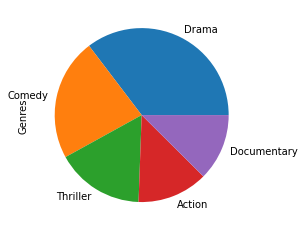

In [17]:
#all time top 5
topdf = total.sort_values(ascending=False).nlargest(5)
top5pie = topdf.plot(kind="pie")

In [23]:
#top5 for all
top8 = total[["Drama", "Comedy", "Thriller", "Action", "Romance", "Documentary", "Family", "Fantasy"]]

top8

Genres
Drama          7227
Comedy         4637
Thriller       3354
Action         2683
Romance        2359
Documentary    2546
Family         1514
Fantasy        1089
Name: Genres, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

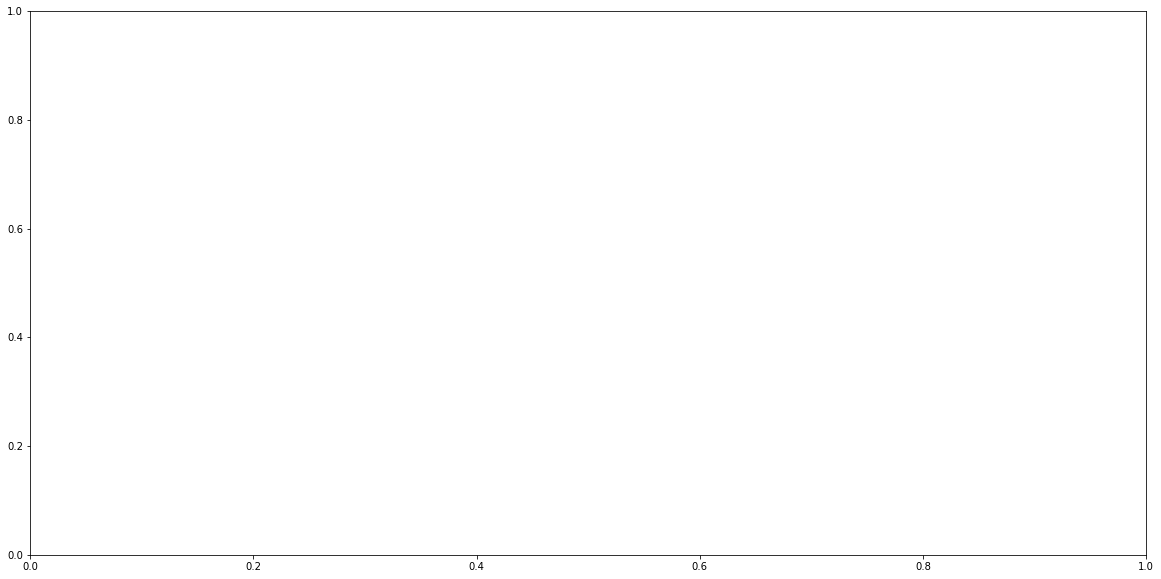

In [25]:
x_axis = np.arange(len(top8))
tick_locations = [value+1 for value in x_axis]
plt.figure(figsize=(20,10))
plt.bar(x_axis, total, color='b', alpha=1, align="edge")
plt.xticks(tick_locations, ["Drama", "Comedy", "Thriller", "Action", "Romance", "Documentary", "Family", "Fantasy"])
plt.title("Tumor Volume Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")